In [1]:
import sys
sys.path.append('../') # or just install the module

In [2]:
import numpy as np

N = 20
class_names = ['a', 'b', 'c']
y_target = np.random.randint(0, len(class_names), size=(N))
y_pred_p = np.random.uniform(0, 1, size=(N, len(class_names)))
y_pred_p = y_pred_p/np.sum(y_pred_p, axis=1)[...,None]
#print(np.sum(y_probs, axis=1))
print('y_target', y_target, y_target.shape)
print('y_pred_p', y_pred_p.shape)

y_target [1 1 1 2 0 1 2 0 1 1 1 0 1 1 2 1 1 0 0 2] (20,)
y_pred_p (20, 3)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]
[  0.  20.  40.  60.  80. 100.]


(<Figure size 480x400 with 2 Axes>,
 array([[[0.4       , 0.2       , 0.4       ],
         [0.27272727, 0.09090909, 0.63636364],
         [0.25      , 0.75      , 0.        ]]]))

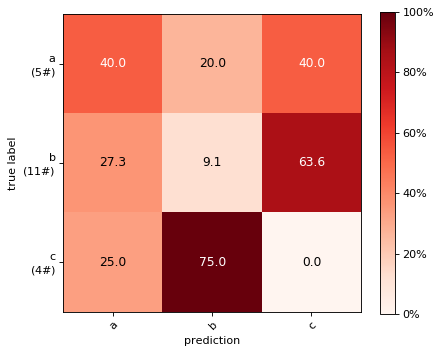

In [42]:
%load_ext autoreload
%autoreload 2
from fuzzytools.datascience import metrics as metrics
from fuzzytools.cuteplots.cm_plots import plot_custom_confusion_matrix

metrics_cdict, metrics_dict, cm = metrics.get_multiclass_metrics(y_pred_p, y_target, class_names)
title = ''
#title += f'b-f1score={f1score_xe}'+'\n'
#title += f'b-accuracy={accuracy_xe}%'+'\n'
cm_kwargs = {
    'title':title[:-1],
    'figsize':(6,5),
    'normalize_mode':None,
}
#fig, ax = plot_custom_confusion_matrix(cm[None], class_names, **cm_kwargs)
cm_kwargs = {
    'title':title[:-1],
    'figsize':(6,5),
    'normalize_mode':'true',
}
plot_custom_confusion_matrix(cm[None], class_names, **cm_kwargs)

In [4]:
y_pred_p, y_target

(array([[0.46012428, 0.14344073, 0.39643499],
        [0.63149636, 0.03882613, 0.32967752],
        [0.30788759, 0.12337906, 0.56873335],
        [0.43607464, 0.56302469, 0.00090067],
        [0.33906396, 0.09295841, 0.56797763],
        [0.11509244, 0.47074175, 0.41416581],
        [0.4596532 , 0.05159634, 0.48875047],
        [0.34957062, 0.27347383, 0.37695554],
        [0.18748226, 0.49686424, 0.31565349],
        [0.23684013, 0.31801509, 0.44514478],
        [0.29191652, 0.53425369, 0.17382979],
        [0.29602884, 0.51233329, 0.19163787],
        [0.23715011, 0.45557862, 0.30727126],
        [0.41868007, 0.24455924, 0.33676069],
        [0.24685074, 0.3958382 , 0.35731106],
        [0.27736783, 0.26294872, 0.45968345],
        [0.27293954, 0.51909817, 0.20796229],
        [0.0304141 , 0.53651908, 0.43306681],
        [0.54536926, 0.23429332, 0.22033742],
        [0.43597943, 0.54337202, 0.02064855]]),
 array([2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1]))

In [5]:
%load_ext autoreload
%autoreload 2
from fuzzytools.datascience import metrics as metrics
from fuzzytools.cuteplots.cm_plots import plot_custom_confusion_matrix

metrics_cdict, metrics_dict, cm = metrics.get_multiclass_metrics(y_pred_p, y_target, class_names)
{c:metrics_cdict[c]['recall'] for c in class_names}
print(metrics_dict)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'b-accuracy': 0.46666643333345004, 'w-accuracy': 0.4699997650001174, 'b-precision': 0.20555518796370484, 'w-precision': 0.20583295736188006, 'b-recall': 0.2063488851101024, 'w-recall': 0.19999969047667235, 'b-f1score': 0.19521639008381983, 'w-f1score': 0.19247745958363588, 'b-xentropy': 1.354291120882565, 'w-xentropy': 1.3565469985610599, 'b-prauc': 0.36694291158576875, 'w-prauc': 0.3668421162171162, 'b-rocauc': 0.48473748473748474, 'w-rocauc': 0.4851648351648351}


In [6]:
from sklearn import metrics as skmetrics

y_pred = y_pred_p.argmax(axis=-1)
precision, recall, score,_ = skmetrics.precision_recall_fscore_support(y_target, y_pred, average=None, labels=range(0, len(class_names)))
print(recall)

[0.14285714 0.33333333 0.14285714]


In [7]:
assert 0

AssertionError: 

In [ ]:
y_pred = np.array([0 ,0, 1, 0 ,0, 1 ,1 ,0, 0, 0, 0, 1, 0, 0, 0, 0, 0 ,0, 0 ,0]).astype(bool)
y_target = np.array([0, 0, 0 ,1 ,0 ,1, 0, 0 ,0, 1, 0, 0, 1, 0, 0, 1 ,0, 0 ,0 ,1]).astype(bool)
precision, recall, score,_ = skmetrics.precision_recall_fscore_support(y_target, y_pred, average='binary', pos_label=1)
print(precision)